# Ch07. C5.0

2016930025  
공간정보공학과  
최석규

## 개요
`의사결정나무` 분석은 데이터를 여러 그룹으로 분류하여 변수 간 나타나는 의사결정규칙을 나무구조와 같이 분류하는방법이다. 

의사결정나무를 발견하는 방법은 `엔트로피`와 `정보획득이론`을 기반으로 하는 ID3, C4.5, C5.0이 있고 통계학에 기반을 둔 CART, CHAID가 있다.

<br/>

### C5.0
`C5.0` 알고리즘은 분류된 정도를 나타내는 엔트로피에 따른 분류에 의해 얻어지는 정보이득이 큰 순서로 의사결정나무를 만든다.

`엔트로피`는 `분류의 정도`를 나타내는 지표로 분류가 잘 되어있을 수록 작고 고르게 섞여있을 수록 크다. 

`정보이득`은 분류 전과 후의 `엔트로피 변화량`이다. 엔트로피는 작을 수록 잘 분류된 것이고 정보이득은 클 수록 해당 분류가 데이터를 잘 분류한다고 볼 수 있다.

#### 타이타닉 예시

>좌석 등급, 성별, 생존여부를 속성으로 갖는 타이타닉 탑승자 데이터를 이용해 좌석 등급과 성별에 따른 타이타닉 생존자를 분류하고 예측해보자. 

분류 기준이 될 수 있는 좌석 등급과 성별은 `입력변수`, 최종 분류 하고싶은 속성인 생존 여부는 `목표변수`가 된다.

## 기본 예제

### 패키지

- sklearn.tree: 의사결정 나무 분석 패키지
- confusion_matrix: 예측과 실제값 비교를 위한 모듈
- accuracy_score: 정확도 평가를 위한 모듈
- matplotlib: 의사결정나무 그래프 출력

In [1]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# 학습용 데이터
# (등급, 성별(남:1, 여:0))
X_train = [
    [1,1],[1,1],[1,1],[1,0],[2,1],
    [2,1],[2,1],[2,1],[2,0],[2,0]
]
# 생존:1, 사망:0
Y_train = [1,1,1,1,0,0,0,1,1,1]

# 테스트용 데이터
X_test = [[1,1],[1,0],[2,1],[2,0]]
Y_test = [1,1,0,1]

### 모형화

In [3]:
# C5.0 모형 설정
clf = tree.DecisionTreeClassifier(criterion='entropy')

### 학습

In [4]:
# 모형 학습
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

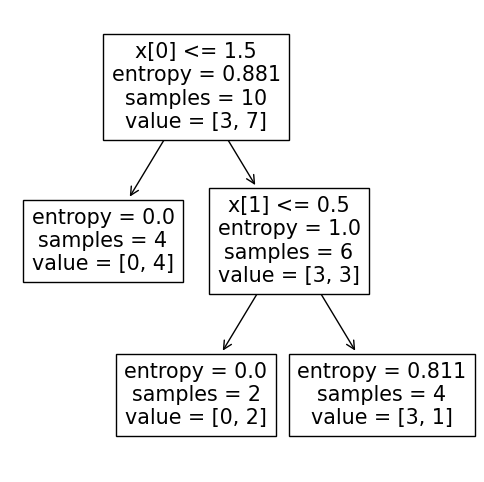

In [5]:
# 모형 그래프 출력
plt.figure(figsize=(6,6))
tree.plot_tree(clf)
plt.show()

### 예측 및 결과 분석

In [6]:
# 분류 예측
Y_pred=clf.predict(X_test)
print(Y_pred)

[1 1 0 1]


In [10]:
# 결과 분석
# 혼돈 행렬
print(confusion_matrix(Y_test,Y_pred))

[[1 0]
 [0 3]]


In [8]:
# 정확도
print(accuracy_score(Y_test,Y_pred))

1.0


## 응용 예제

붓꽃 데이터를 의사결정나무를 만들어보자

### 패키지 설정

- sklearn.datasets.load_iris: 붓꽃 데이터셋 로더  
- train_test_split: 학습용/테스트용 데이터 분리 함수   
- sklearn.tree: 의사결정 나무 분석 패키지
- confusion_matrix: 예측과 실제값 비교를 위한 혼돈행렬 모듈
- accuracy_score: 정확도 평가를 위한 모듈
- matplotlib: 의사결정나무 그래프 출력

In [22]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

### 데이터 준비

In [26]:
# 데이터 로딩
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [27]:
# 입력항목명
print(iris.feature_names)

# 목표 클래스의 유형
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [28]:
# 입력데이터
X = iris.data
# 목표데이터
Y = iris.target

In [29]:
# 학습용과 테스트용 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


### 모형화

In [30]:
# C5.0 모형 설정
clf = tree.DecisionTreeClassifier(criterion='entropy')

### 학습

In [33]:
clf = clf.fit(X_train, Y_train)

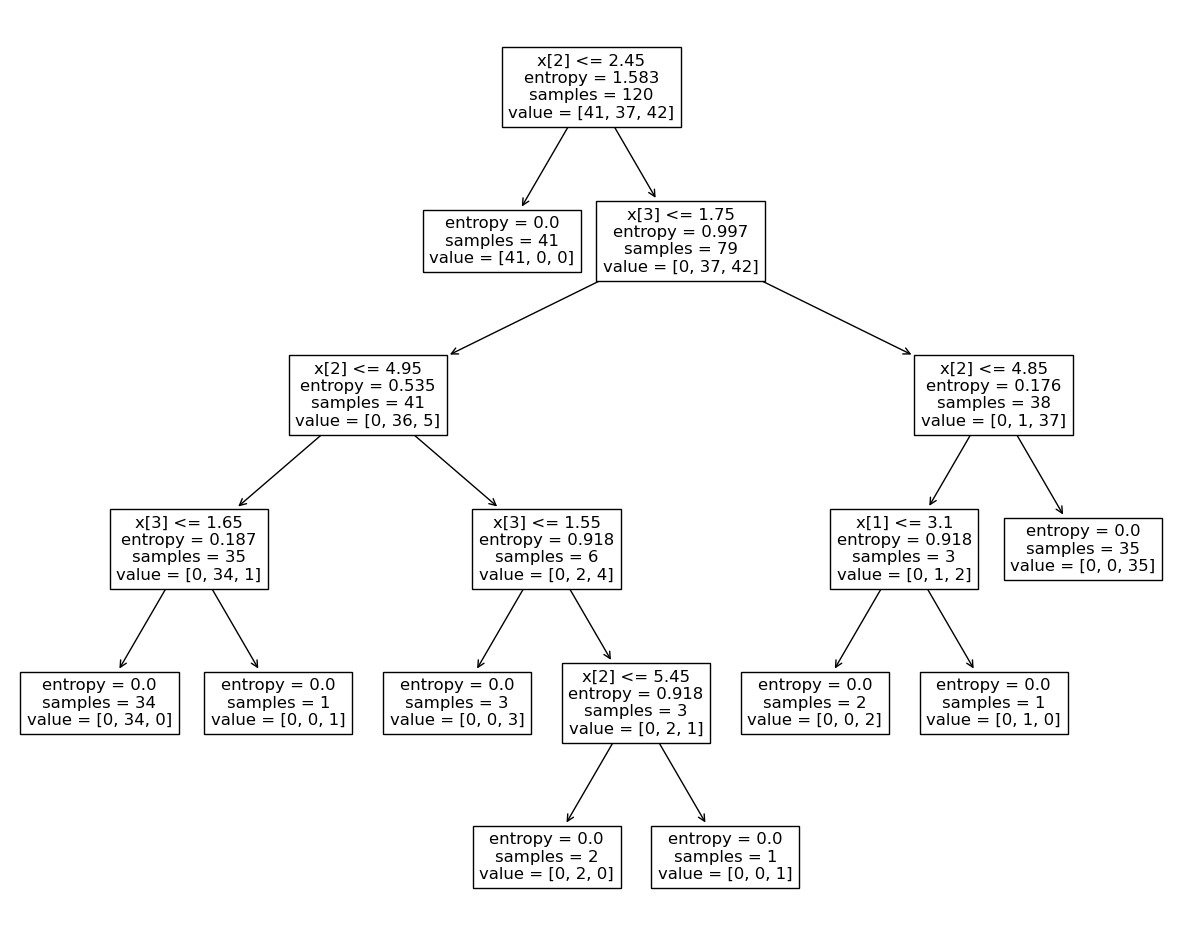

In [34]:
# 의사결정나무 출력
plt.figure(figsize=(15,12))
tree.plot_tree(clf)
plt.show()

### 예측 및 결과 분석

In [35]:
# 분류 예측
Y_pred = clf.predict(X_test)
print(Y_pred)

[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]


In [36]:
# 혼돈행렬을 이용한 평가
print(confusion_matrix(Y_test,Y_pred))

[[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [37]:
# 정확도 출력
print(accuracy_score(Y_test,Y_pred))

1.0
